# Word Clouds

In [12]:
#!pip install wordcloud

In [13]:
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

In [15]:
# open the file and read it into a variable alice_novel
alice_novel = open('alice_novel.txt', 'r').read()

print('file downloaded saved!')

file downloaded saved!


In [16]:
stopwords = set(STOPWORDS)

Create a word cloud object and generate a word cloud. For simplicity, let's generate a word cloud using only the first 2000 words in the novel.

In [17]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

In [18]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

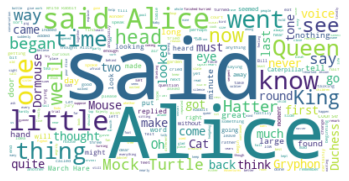

In [19]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show

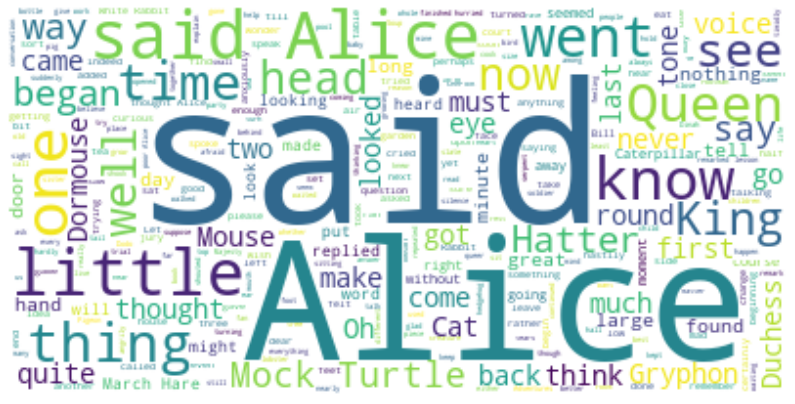

In [20]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

#display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

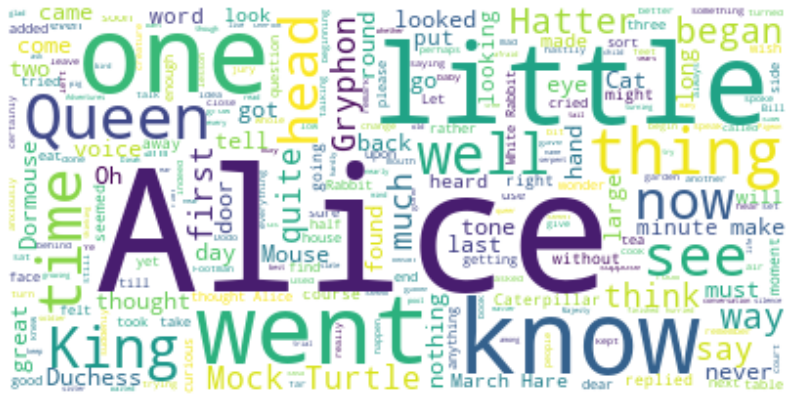

In [22]:
stopwords.add('said')# add the words said to stopwords

# re-generate the word clo
alice_wc.generate(alice_novel)

## display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [24]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

# save mask to alice_mask
alice_mask = np.array(Image.open('alice_mask.png'))

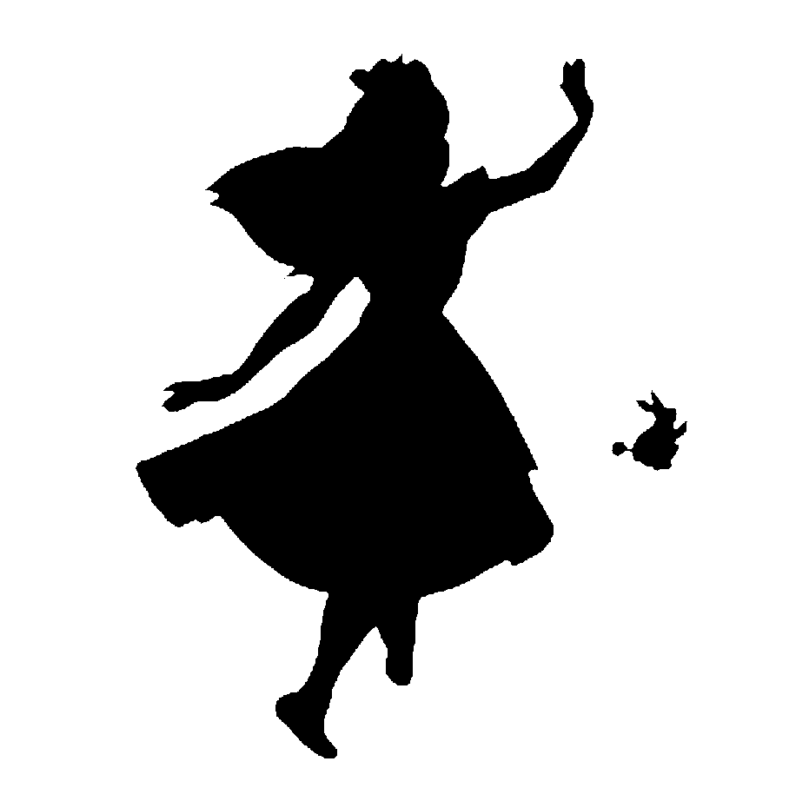

In [25]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the word cloud according to the mask is straightforward using word_cloud package. For simplicity, we will continue using the first 2000 words in the novel.

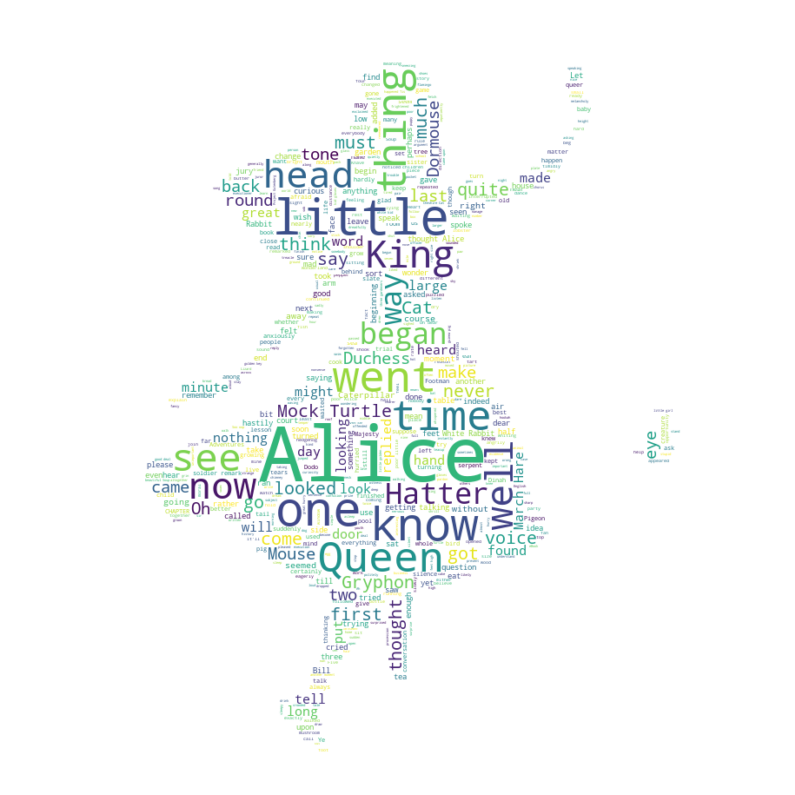

In [26]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

#generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

 Let's generate sample text data from our immigration dataset, say text data of 90 words

In [28]:
df_canada = pd.read_excel('Canada.xlsx', 'Canada by Citizenship', skiprows=range(20), skipfooter=2)

In [29]:
df_canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


# Clean Up Data

In [31]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_canada.drop(['Type', 'Coverage', 'AREA', 'REG','DEV','DevName'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_canada.rename(columns={'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_canada.columns = list(map(str,df_canada.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_canada.set_index('Country', inplace=True)

# add total column
df_canada['total'] = df_canada.sum(axis=1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_canada.shape)

data dimensions: (195, 37)


In [32]:
total_immigration = df_canada['total'].sum()
total_immigration

6409153

Using countries with single-word names, let's duplicate each country's name based on how much they contribute to the total immigration.

In [34]:
max_words = 90
word_string = ''
for country in df_canada.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_canada.loc[country, 'total']/float(total_immigration)* max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

We are not dealing with any stopwords here, so there is no need to pass them when creating the word cloud.

In [35]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created! ')

Word cloud created! 


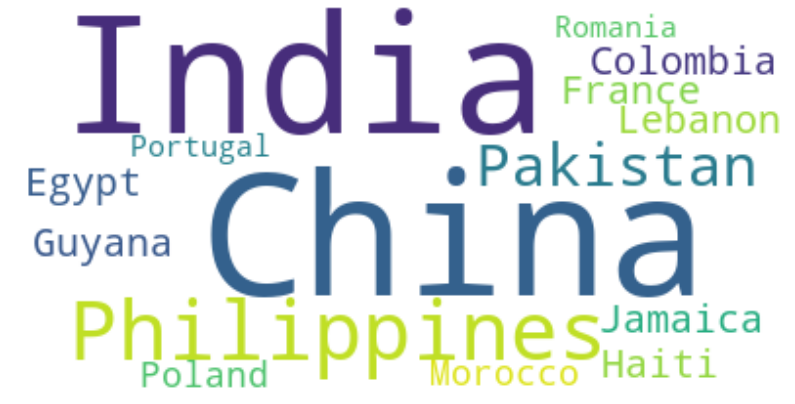

In [36]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

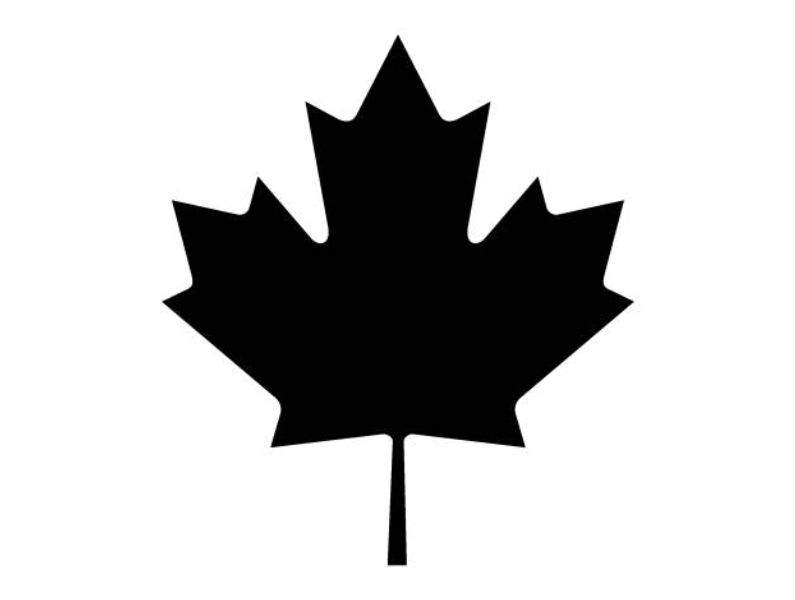

In [54]:
# save mask to alice_mask
canada_flag = np.array(Image.open('canada_flag.png'))

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(canada_flag, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [55]:
max_words = 90
word_string = ''
for country in df_canada.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_canada.loc[country, 'total']/float(total_immigration)* max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
        
# display the generated text
word_string


'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

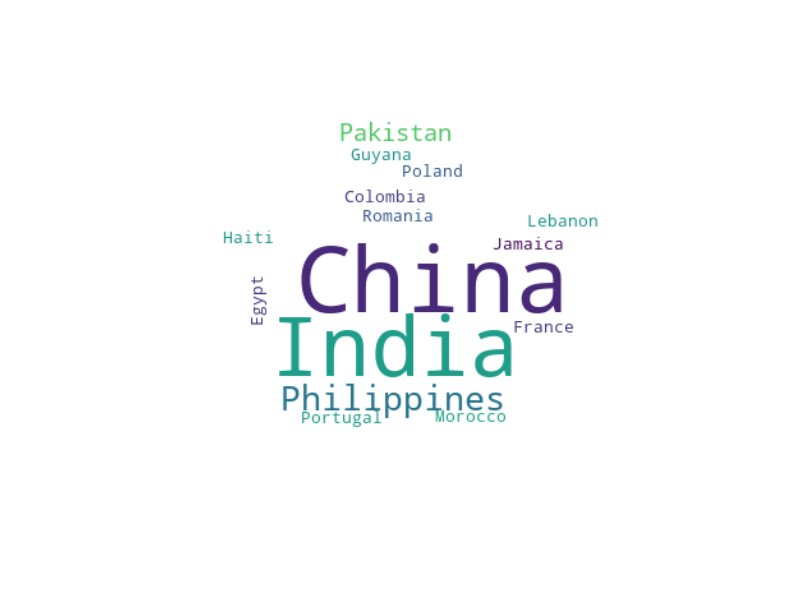

In [56]:
# instantiate a word cloud object
canada_wc = WordCloud(background_color='white', max_words=90, mask=canada_flag, stopwords=stopwords)
#generate the word cloud
canada_wc.generate(word_string)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(canada_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Regression Plots 

In [57]:
# import library
import seaborn as sns

Create a new dataframe that stores that total number of landed immigrants to Canada per year from 1980 to 2013.

In [58]:
# we can use the sum() method to get the total population per year
df_total = pd.DataFrame(df_canada[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_total.index = map(float, df_total.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace=True)

# rename columns
df_total.columns=['year', 'total']

# view the final dataframe
df_total.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


With seaborn, generating a regression plot is as simple as calling the regplot function

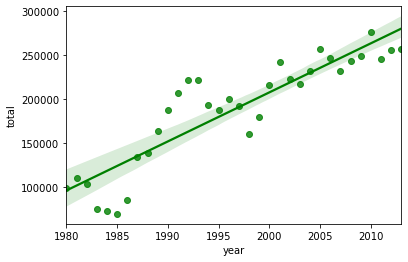

In [62]:
ax = sns.regplot(x='year', y='total', data=df_total, color='green')

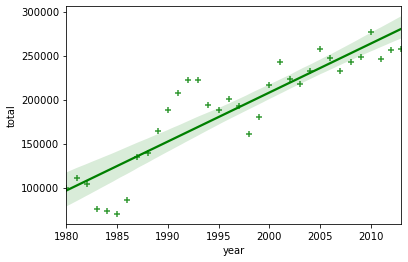

In [67]:
#customize the marker shape, so instead of circular markers, let's use '+'.
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

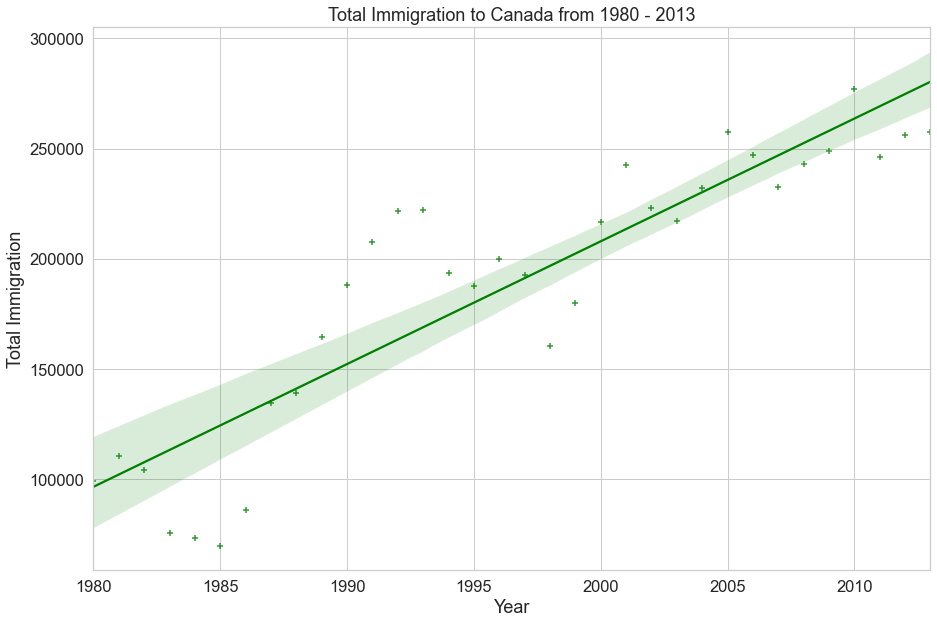

In [71]:
#Let's blow up the plot a little bit so that it is more appealing to the sight.
plt.figure(figsize=(15, 10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+')

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title